# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import _pickle as pickle
from math import *

# Function to Sort Dictonary

In [2]:
def sort_dict(dct,parameter,order='Ascending'):
    if parameter=='key':
        if(order=='reverse'):
            sorted_tuples = sorted(dct.items(),key=lambda item:item[0],reverse=True)
            return {k:v for k,v in sorted_tuples}
        else:
            sorted_tuples = sorted(dct.items(),key=lambda item:item[0])
            return {k:v for k,v in sorted_tuples}
    else:
        if(order=='reverse'):
            sorted_tuples = sorted(dct.items(),key=lambda item:item[1],reverse=True)
            return {k:v for k,v in sorted_tuples}
        else:
            sorted_tuples = sorted(dct.items(),key=lambda item:item[1])
            return {k:v for k,v in sorted_tuples}

# Importing Database

In [3]:
df = pd.read_csv('Merged_Database.csv')

In [4]:
df.head()

,Unnamed: 0,Authors,Title,Year,Cited by,Funding Details,Country
0,0,"Tao F., Qi Q., Liu A., Kusiak A.",Data-driven smart manufacturing,2018,375.0,National Natural Science Foundation of China\n...,Australia
1,1,"Zhang K., Gao X., Tao D., Li X.",Single image super-resolution with non-local m...,2012,362.0,National Natural Science Foundation of China\n...,Australia
2,2,"Kristan M., Matas J., Leonardis A., Vojir T., ...",A Novel Performance Evaluation Methodology for...,2016,264.0,Seventh Framework Programme,Australia
3,3,"Ding C., Choi J., Tao D., Davis L.S.",Multi-Directional Multi-Level Dual-Cross Patte...,2016,243.0,National Science Foundation\n\nAustralian Rese...,Australia
4,4,"Celebi M.E., Kingravi H.A., Iyatomi H., Asland...",Border detection in dermoscopy images using st...,2008,241.0,National Cancer Institute,Australia


In [5]:
df.shape

(9074, 7)

# Removing Unnamed column and renaming Cited by column for ease of use

In [6]:
df.drop('Unnamed: 0',axis='columns',inplace=True)

In [7]:
df.rename(columns={'Cited by':'Cited_by'},inplace=True)

# Reading Authors names from previously created file and storing those in python list

In [8]:
set_authors = []
with open('Authors_list.txt','r') as filehandle:
    filecontents = filehandle.readlines()

    for line in filecontents:
        # remove linebreak which is the last character of the string
        author = line[:-1]

        # add item to the list
        set_authors.append(author)
filehandle.close()

# Reading Previously Created Author:Database Dictonary

In [9]:
dct_author_database = {}
with open('Author_database_dictonary.txt','rb') as file:
    dct_author_database = pickle.load(file)
file.close()

In [10]:
index = 6
print(set_authors[index])
dct_author_database[set_authors[index]]

Tao D.


,Authors,Title,Year,Cited_by,Funding Details
0,"Zhang K., Gao X., Tao D., Li X.",Single image super-resolution with non-local m...,2012,362.0,National Natural Science Foundation of China\n...
1,"Ding C., Choi J., Tao D., Davis L.S.",Multi-Directional Multi-Level Dual-Cross Patte...,2016,243.0,National Science Foundation\n\nAustralian Rese...
2,"Gui J., Sun Z., Ji S., Tao D., Tan T.",Feature selection based on structured sparsity...,2017,151.0,National Science Foundation\n\nShanghai Key La...
3,"Geng B., Tao D., Xu C.",DAML: Domain adaptation metric learning,2011,120.0,National Natural Science Foundation of China\n...
4,"Gao X., Wang B., Tao D., Li X.",A relay level set method for automatic image s...,2011,102.0,Microsoft Research Asia\n\nNational Natural Sc...
5,"Tang J., Zha Z.-J., Tao D., Chua T.-S.",Semantic-gap-oriented active learning for mult...,2012,96.0,Australian Research Council\n\nNational Natura...
6,"Yu J., Liu D., Tao D., Seah H.S.",On combining multiple features for cartoon cha...,2012,93.0,Australian Research Council\n\nNational Natura...
7,"Deng C., Liu X., Li C., Tao D.",Active multi-kernel domain adaptation for hype...,2018,61.0,National Natural Science Foundation of China\n...
8,"Du B., Wang Z., Zhang L., Zhang L., Tao D.",Robust and Discriminative Labeling for Multi-L...,2017,58.0,Australian Research Council\n\nNational Natura...
9,"Song M., Tao D., Huang X., Chen C., Bu J.",Three-dimensional face reconstruction from a s...,2012,58.0,Australian Research Council\n\nNational Natura...


# a) Highest cited author and his h-index (from the world)


In [11]:
author_with_highest_citations = ""
max_citations = 0
for author in set_authors:
    cites = dct_author_database[author]['Cited_by'].sum()
    if max_citations<cites:
        author_with_highest_citations = author
        max_citations = cites


In [12]:
df_of_highest_cited_author = dct_author_database[author_with_highest_citations]
rows,cols = df_of_highest_cited_author.shape
h_index = min(rows,df_of_highest_cited_author['Cited_by'].min())

In [13]:
print(f'Max cited author    = {author_with_highest_citations}')
print(f'Total cited by      = {max_citations}')
print(f'His h-index         = {h_index}')

Max cited author    = V
Total cited by      = 67340.0
His h-index         = 0.0


# b) Highest publication author

In [14]:
author_with_highest_publication = ""
max_publication_count = 0
for author in set_authors:
    rows, columns = dct_author_database[author].shape
    if rows>max_publication_count:
        max_publication_count=rows
        author_with_highest_publication = author
        # print(f'{author}                    \t{rows}')

In [15]:
print(f'Author\t\t= {author_with_highest_publication}\nPublications\t= {max_publication_count}')
dct_author_database[author_with_highest_publication]

Author		= V
Publications	= 1045


,Authors,Title,Year,Cited_by,Funding Details
0,"Kristan M., Matas J., Leonardis A., Vojir T., ...",A Novel Performance Evaluation Methodology for...,2016,264.0,Seventh Framework Programme
1,"Celebi M.E., Kingravi H.A., Iyatomi H., Asland...",Border detection in dermoscopy images using st...,2008,241.0,National Cancer Institute
2,"Van Delden H., Seppelt R., White R., Jakeman A.J.",A methodology for the design and development o...,2011,117.0,European Commission
3,"Celebi M.E., Iyatomi H., Stoecker W.V., Moss R...",Automatic detection of blue-white veil and rel...,2008,104.0,National Science Foundation\n\nNational Instit...
4,"De Jong J.T.A., Verdoes Kleijn G.A., Erben T.,...",The third data release of the Kilo-Degree Surv...,2017,91.0,Alexander von Humboldt-Stiftung\n\nAssociation...
...,...,...,...,...,...
1040,"Cecchi G.A., Huang L., Hashmi J.A., Baliki M.,...",Predictive Dynamics of Human Pain Perception,2012,40.0,National Institute of Neurological Disorders a...
1041,"Goldberg B.D., Iftimia N.V., Bressner J.E., Pi...",Automated algorithm for differentiation of hum...,2008,40.0,National Institutes of Health\n\nNational Inst...
1042,"Martins S.B., Shahar Y., Goren-Bar D., Galperi...",Evaluation of an architecture for intelligent ...,2008,40.0,National Institutes of Health\n\nU.S. National...
1043,"Liu H., Tarima S., Borders A.S., Getchell T.V....",Quadratic regression analysis for gene discove...,2005,40.0,National Institute on Aging\n\nNational Center...


# c) Highest cited authors avg. citations, and the country name.

In [16]:
dct_author_database[author_with_highest_citations]

,Authors,Title,Year,Cited_by,Funding Details
0,"Kristan M., Matas J., Leonardis A., Vojir T., ...",A Novel Performance Evaluation Methodology for...,2016,264.0,Seventh Framework Programme
1,"Celebi M.E., Kingravi H.A., Iyatomi H., Asland...",Border detection in dermoscopy images using st...,2008,241.0,National Cancer Institute
2,"Van Delden H., Seppelt R., White R., Jakeman A.J.",A methodology for the design and development o...,2011,117.0,European Commission
3,"Celebi M.E., Iyatomi H., Stoecker W.V., Moss R...",Automatic detection of blue-white veil and rel...,2008,104.0,National Science Foundation\n\nNational Instit...
4,"De Jong J.T.A., Verdoes Kleijn G.A., Erben T.,...",The third data release of the Kilo-Degree Surv...,2017,91.0,Alexander von Humboldt-Stiftung\n\nAssociation...
...,...,...,...,...,...
1040,"Cecchi G.A., Huang L., Hashmi J.A., Baliki M.,...",Predictive Dynamics of Human Pain Perception,2012,40.0,National Institute of Neurological Disorders a...
1041,"Goldberg B.D., Iftimia N.V., Bressner J.E., Pi...",Automated algorithm for differentiation of hum...,2008,40.0,National Institutes of Health\n\nNational Inst...
1042,"Martins S.B., Shahar Y., Goren-Bar D., Galperi...",Evaluation of an architecture for intelligent ...,2008,40.0,National Institutes of Health\n\nU.S. National...
1043,"Liu H., Tarima S., Borders A.S., Getchell T.V....",Quadratic regression analysis for gene discove...,2005,40.0,National Institute on Aging\n\nNational Center...


In [17]:
rows, cols = dct_author_database[author_with_highest_citations].shape

avg_citations_of_author_with_highest_citations = max_citations/rows
print(f'Highest Cited Author \t= {author_with_highest_citations}')
print(f'His Average Citations \t= {avg_citations_of_author_with_highest_citations}')
print(f'His Total Publications \t= {rows}')

Highest Cited Author 	= V
His Average Citations 	= 64.4401913875598
His Total Publications 	= 1045


## A google search with above author's name tells us that he's from 'United Kingdom' and doing reasearch on 'Artificial Intelligence'

# d) Total number of publications of the highest cited author


In [18]:
print(f'Highest Cited Author \t= {author_with_highest_citations}')
print(f'Total Publications \t= {rows}')
dct_author_database[author_with_highest_citations]

Highest Cited Author 	= V
Total Publications 	= 1045


,Authors,Title,Year,Cited_by,Funding Details
0,"Kristan M., Matas J., Leonardis A., Vojir T., ...",A Novel Performance Evaluation Methodology for...,2016,264.0,Seventh Framework Programme
1,"Celebi M.E., Kingravi H.A., Iyatomi H., Asland...",Border detection in dermoscopy images using st...,2008,241.0,National Cancer Institute
2,"Van Delden H., Seppelt R., White R., Jakeman A.J.",A methodology for the design and development o...,2011,117.0,European Commission
3,"Celebi M.E., Iyatomi H., Stoecker W.V., Moss R...",Automatic detection of blue-white veil and rel...,2008,104.0,National Science Foundation\n\nNational Instit...
4,"De Jong J.T.A., Verdoes Kleijn G.A., Erben T.,...",The third data release of the Kilo-Degree Surv...,2017,91.0,Alexander von Humboldt-Stiftung\n\nAssociation...
...,...,...,...,...,...
1040,"Cecchi G.A., Huang L., Hashmi J.A., Baliki M.,...",Predictive Dynamics of Human Pain Perception,2012,40.0,National Institute of Neurological Disorders a...
1041,"Goldberg B.D., Iftimia N.V., Bressner J.E., Pi...",Automated algorithm for differentiation of hum...,2008,40.0,National Institutes of Health\n\nNational Inst...
1042,"Martins S.B., Shahar Y., Goren-Bar D., Galperi...",Evaluation of an architecture for intelligent ...,2008,40.0,National Institutes of Health\n\nU.S. National...
1043,"Liu H., Tarima S., Borders A.S., Getchell T.V....",Quadratic regression analysis for gene discove...,2005,40.0,National Institute on Aging\n\nNational Center...


# e) Total publication in year

In [19]:
year_lst = sorted(list(df['Year'].unique()))
country_lst = list(df['Country'].unique())

In [20]:
df_without_duplicates = df.drop_duplicates(subset=['Authors','Title'],keep='first')

In [21]:
dct_df_per_year_publications = {}
for year in year_lst:
    dct_df_per_year_publications[year], cols = df_without_duplicates[df_without_duplicates.Year==year].shape

In [22]:
dct_df_per_year_publications = sort_dict(dct_df_per_year_publications,'Values','reverse')
dct_df_per_year_publications

{2018: 715,
 2019: 653,
 2020: 634,
 2017: 486,
 2016: 477,
 2014: 392,
 2013: 354,
 2015: 332,
 2008: 323,
 2011: 295,
 2012: 289,
 2021: 263,
 2007: 261,
 2009: 240,
 2005: 225,
 2010: 222,
 2006: 217,
 2004: 140,
 2003: 52,
 1998: 45,
 2001: 44,
 1999: 41,
 2002: 41,
 1995: 40,
 1997: 37,
 1996: 34,
 2000: 34,
 1990: 31,
 1991: 26,
 1994: 24,
 1987: 18,
 1988: 17,
 1989: 17,
 1993: 16,
 1992: 14,
 1986: 5,
 1983: 4,
 1984: 4,
 1975: 3,
 1974: 2,
 1978: 2,
 1982: 2,
 1985: 2,
 1971: 1,
 1972: 1,
 1973: 1,
 1976: 1,
 1979: 1}

# f) Total citation per year

In [23]:
dct_citations_per_year = {}
for year in year_lst:
    dct_citations_per_year[year] = df_without_duplicates[df_without_duplicates.Year==year]['Cited_by'].sum()

dct_citations_per_year = sort_dict(dct_citations_per_year,'Values','reverse')

In [24]:
dct_citations_per_year

{2007: 38723.0,
 2008: 36518.0,
 2009: 36322.0,
 2005: 33098.0,
 2010: 31688.0,
 2018: 28907.0,
 2017: 27091.0,
 2016: 25762.0,
 2004: 25251.0,
 2011: 24961.0,
 2006: 23840.0,
 2014: 20326.0,
 2013: 19041.0,
 2012: 18926.0,
 2015: 18629.0,
 2019: 14823.0,
 1997: 13291.0,
 1999: 11706.0,
 1975: 9259.0,
 2001: 6464.0,
 1998: 5943.0,
 1990: 5237.0,
 1987: 4926.0,
 2002: 4876.0,
 2003: 4733.0,
 2020: 4482.0,
 1995: 4429.0,
 1996: 3876.0,
 1991: 3652.0,
 1989: 3552.0,
 2000: 3304.0,
 1994: 2231.0,
 1993: 1956.0,
 1992: 1424.0,
 1973: 1323.0,
 1988: 1078.0,
 1986: 858.0,
 1985: 772.0,
 1982: 495.0,
 2021: 357.0,
 1983: 348.0,
 1978: 300.0,
 1984: 217.0,
 1974: 128.0,
 1979: 53.0,
 1971: 51.0,
 1972: 46.0,
 1976: 41.0}

# g) Author(country) having highest co-authorship with indian authors.

## Reading India Authors name from previously created file

In [26]:
set_of_indian_authors = []
with open('India_authors_list.txt','r') as filehandle:
    filecontents = filehandle.readlines()

    for line in filecontents:
        # remove linebreak which is the last character of the string
        author = line[:-1]

        # add item to the list
        set_of_indian_authors.append(author)
filehandle.close()

## Reading Foreign Authors name from previously created file

In [27]:
set_of_foreign_authors = []
with open('Foreign_authors_list.txt','r') as filehandle:
    filecontents = filehandle.readlines()

    for line in filecontents:
        # remove linebreak which is the last character of the string
        author = line[:-1]

        # add item to the list
        set_of_foreign_authors.append(author)

## Loading Previously created dictonary from file

In [28]:
dct_foreign_author_coauth_count = {}
with open('Foreign_auth_and_their_publication_count_with_india_authors_dct.txt','rb') as file:
    dct_foreign_author_coauth_count = pickle.load(file)
file.close()

## Finding Foreign author with highest co-authorship with India authors

In [29]:
mx_pubs_with_indian_authors = 0
foreign_auth_corr_to_mx_pubs_with_indian_authors = ""
for author in set_of_foreign_authors:
    pubs = dct_foreign_author_coauth_count[author]
    if mx_pubs_with_indian_authors < pubs:
        mx_pubs_with_indian_authors = pubs
        foreign_auth_corr_to_mx_pubs_with_indian_authors = author

In [30]:
print(f'Foreign author with Highest Co-authorship with Indian Authors =  {foreign_auth_corr_to_mx_pubs_with_indian_authors}')
print(mx_pubs_with_indian_authors)

Foreign author with Highest Co-authorship with Indian Authors =  V
132


## A google search with above authors name tells us that he is from "Vascular Screening and Diagnostic Centre, University of Nicosia, Nicosia, Cyprus"

# h) Highest cited author from India and the university

In [31]:
max_cites_of_indian_author = 0
highest_cited_indian_author = ""

for author in set_of_indian_authors:
    cites = dct_author_database[author]['Cited_by'].sum()
    if max_cites_of_indian_author < cites:
        max_cites_of_indian_author = cites
        highest_cited_indian_author = author

In [32]:
highest_cited_indian_author

'Sastry S.S.'

In [33]:
print(f'Highest Cited Author from India = {highest_cited_indian_author}')
print(f'His Total Citations = {max_cites_of_indian_author}')
dct_author_database[highest_cited_indian_author]

Highest Cited Author from India = Sastry S.S.
His Total Citations = 7936.0


,Authors,Title,Year,Cited_by,Funding Details
0,"Yang A.Y., Zhou Z., Balasubramanian A.G., Sast...",Fast ℓ1-minimization algorithms for robust fac...,2013,247.0,0
1,"Wright J., Yang A.Y., Ganesh A., Sastry S.S., ...",Robust face recognition via sparse representation,2009,7689.0,National Science Foundation


# i) Comparative year wise article publication analysis of India, China and USA


In [34]:
df_india = df[df.Country=='India'].copy().reset_index(drop=True)
df_china = df[df.Country=='China'].copy().reset_index(drop=True)
df_usa = df[df.Country=='United States'].copy().reset_index(drop=True)

In [35]:
dct_india_year_publications = {}
dct_china_year_publications = {}
dct_usa_year_publications = {}
for year in year_lst:
    dct_india_year_publications[year], cols1 = df_india[df_india.Year==year].shape
    dct_china_year_publications[year], cols2 = df_china[df_china.Year==year].shape
    dct_usa_year_publications[year], cols3 = df_usa[df_usa.Year==year].shape

## Comparative analysis using graph

In [36]:
x_data = [list(dct_india_year_publications.keys()),list(dct_china_year_publications.keys()),list(dct_usa_year_publications.keys())]
y_data = [list(dct_india_year_publications.values()),list(dct_china_year_publications.values()),list(dct_usa_year_publications.values())]

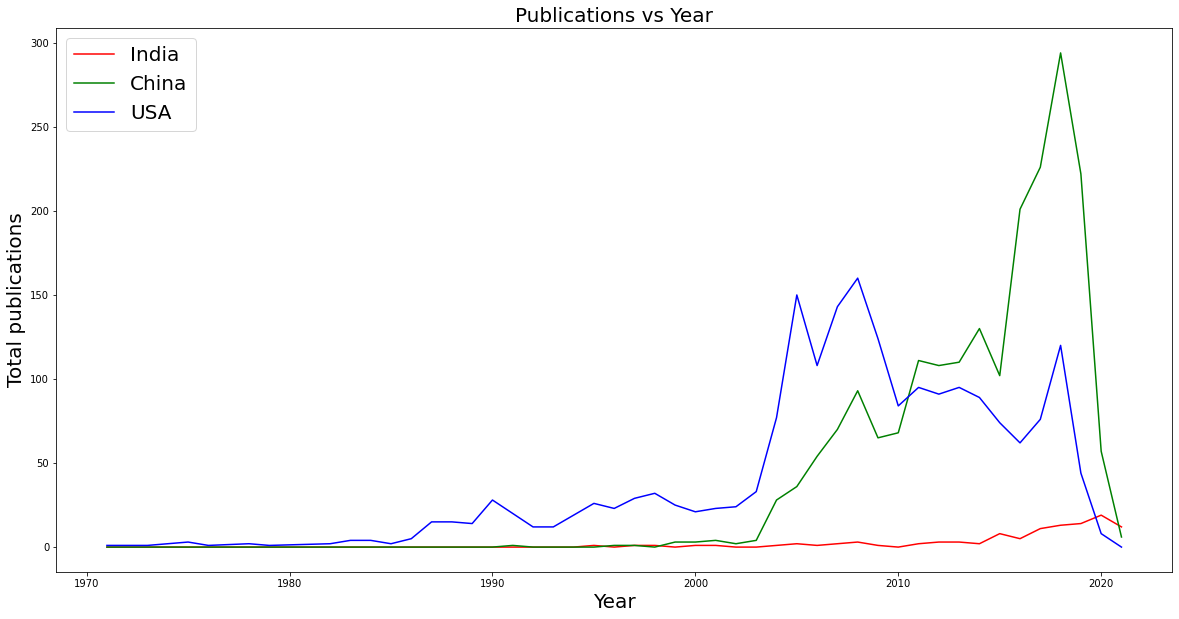

In [37]:
fig = plt.figure(figsize=[20,10])

plt.plot(x_data[0], y_data[0],    label='India',  color='r')
plt.plot(x_data[1], y_data[1],    label='China',  color='g')
plt.plot(x_data[2], y_data[2],    label='USA',    color='b')

plt.xlabel('Year',fontsize=20)
plt.ylabel('Total publications',fontsize=20)
plt.title('Publications vs Year',fontsize=20)
plt.legend(loc='upper left',fontsize=20)
plt.show()

## Generating a smoother curve using scipy.interpolate library

In [38]:
y_new = []
x_new = []
for i in range(3):
    x_new_tmp = np.linspace(year_lst[0],year_lst[0]+len(x_data[0]),1000)
    x_new.append(x_new_tmp)

    spline = interpolate.make_interp_spline(x_data[i], y_data[i])
    y_new.append(spline(x_new_tmp))

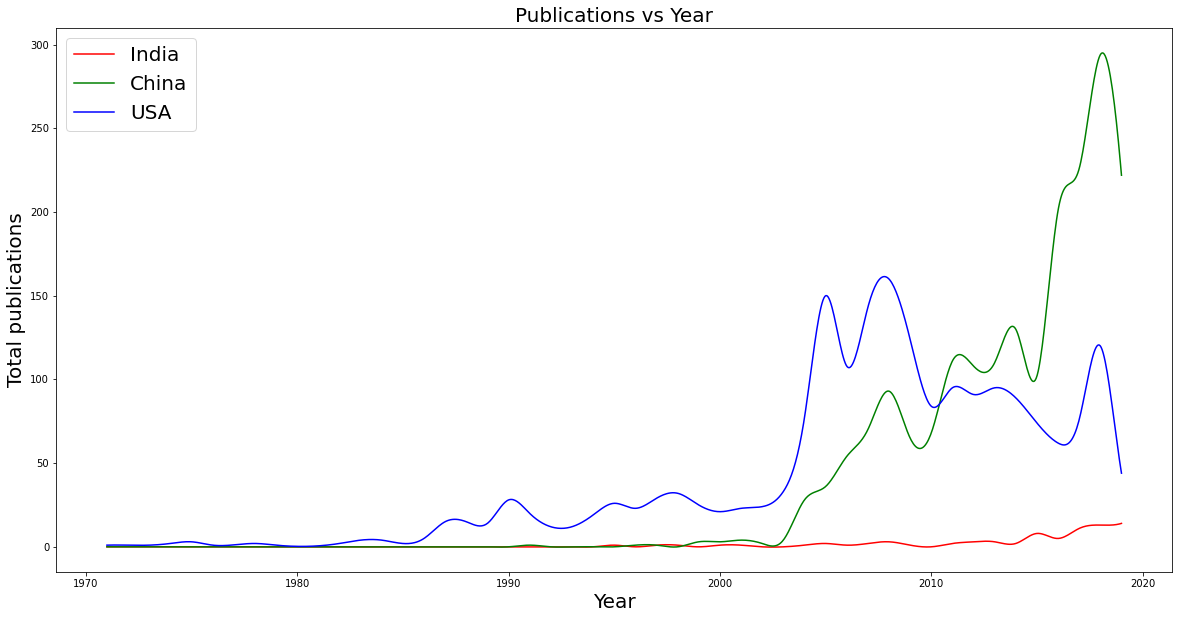

In [39]:
fig = plt.figure(figsize=[20,10])

plt.plot(x_new[0], y_new[0],    label='India',  color='r')
plt.plot(x_new[1], y_new[1],    label='China',  color='g')
plt.plot(x_new[2], y_new[2],    label='USA',    color='b')

plt.xlabel('Year',fontsize=20)
plt.ylabel('Total publications',fontsize=20)
plt.title('Publications vs Year',fontsize=20)
plt.legend(loc='upper left',fontsize=20)
plt.show()

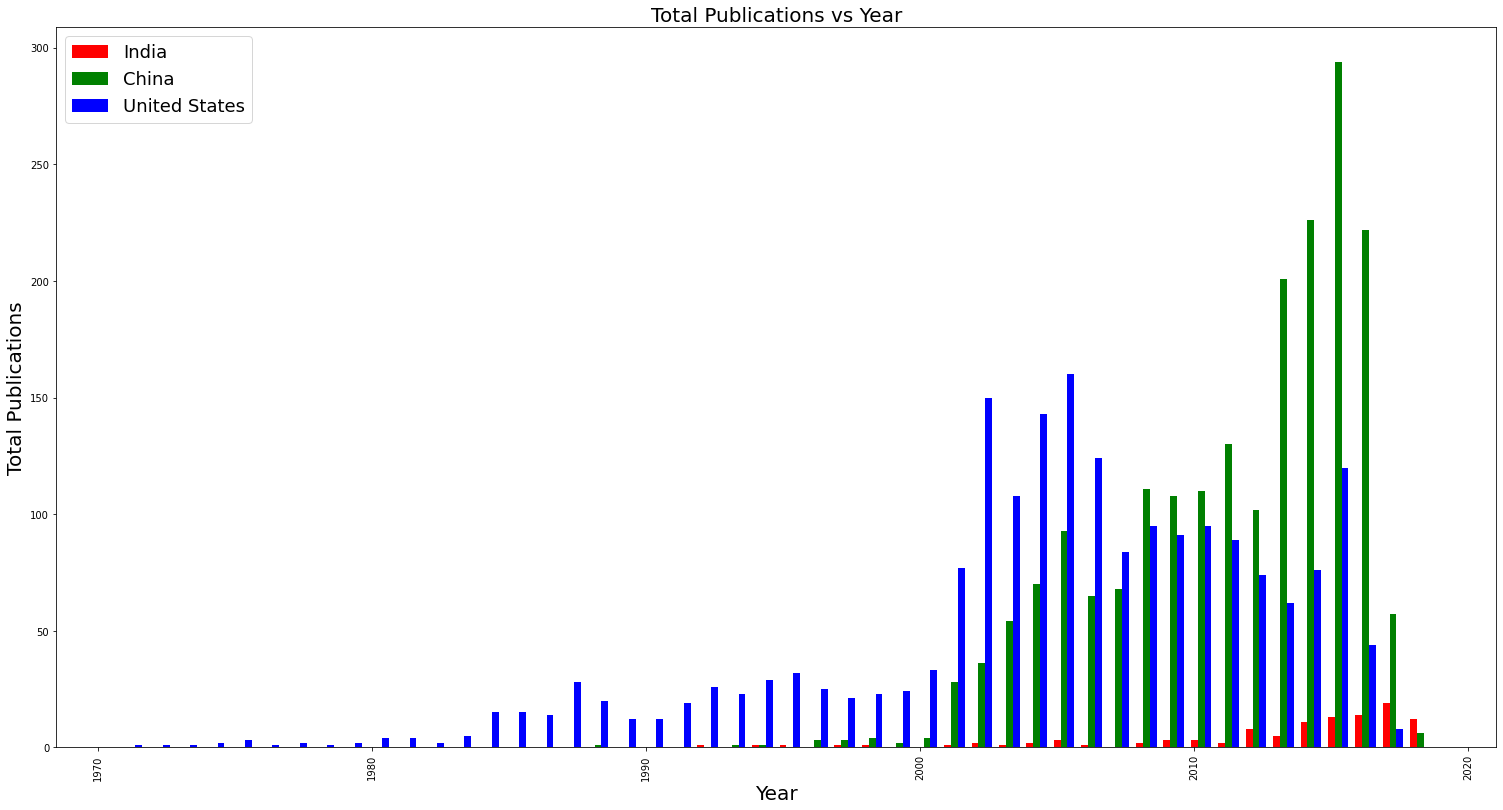

In [40]:
# plt.rcParams['figure.figsize'] = [20,10]
fig = plt.figure(figsize=[20,10])

X = np.arange(len(year_lst))
X = X + year_lst[0]

fig = fig.add_axes([0,0,1,1])

fig.bar(X + 0.00, list(dct_india_year_publications.values()),  label='India',          color='r',  width =0.25)
fig.bar(X + 0.25, list(dct_china_year_publications.values()),  label='China',          color='g',  width =0.25)
fig.bar(X + 0.50, list(dct_usa_year_publications.values()),    label='United States',  color='b',  width =0.25)

fig.legend(loc='upper left',fontsize=18)

plt.xticks(rotation = 'vertical')

plt.title('Total Publications vs Year',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total Publications',fontsize=20)
plt.show()

# j) Total number of grants given to the field


In [48]:
grants, cols = df[df['Funding Details']!=0].shape

In [49]:
print(f'Grants given to field = {grants}')

Grants given to field = 9074


# k) Country wise total number of publication

In [41]:
dct_country_publications = {}
for country in country_lst:
    rows, columns = df[df.Country==country].shape
    dct_country_publications[country] = rows

In [42]:
dct_country_publications = sort_dict(dct_country_publications,'Value','reverse')

In [43]:
dct_country_publications

{'China': 2000,
 'United States': 2000,
 'United Kingdom': 1078,
 'Spain': 884,
 'Germany': 578,
 'Italy': 481,
 'France': 428,
 'Canada': 387,
 'Australia': 339,
 'Netherlands': 269,
 'Japan': 182,
 'South Korea': 166,
 'Taiwan': 116,
 'India': 107,
 'Iran': 59}